<a href="https://colab.research.google.com/github/Arju-cmd/Face-Mask/blob/main/Facemask_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import the Sequential model and layers
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K

In [2]:
from keras.preprocessing.image import ImageDataGenerator

In [3]:
import numpy as np

In [4]:
from keras.preprocessing import image

In [5]:
img_width, img_height =150,150

In [6]:
Train_dat_dir = '/content/drive/MyDrive/Mydrive/Face Mask/maskdata/train'
Validation_data_dir = '/content/drive/MyDrive/Mydrive/Face Mask/maskdata/test'
Nb_train_samples =200
Nb_validation_samples = 200
Epochs = 50
batch_size = 20


In [7]:
if K.image_data_format() == 'channels_first':
  input_shape = (3,img_width, img_height )
else:
  input_shape = (img_width, img_height, 3 )

In [8]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

In [9]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [10]:
train_generator = train_datagen.flow_from_directory(
        Train_dat_dir,  # this is the target directory
        target_size=(img_width, img_height),  # all images will be resized to 150x150
        batch_size=batch_size,
        class_mode='binary')

Found 616 images belonging to 2 classes.


In [11]:
validation_generator = test_datagen.flow_from_directory(
        Validation_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='binary')

Found 198 images belonging to 2 classes.


In [12]:
# MODEL
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [13]:
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss = 'binary_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

In [14]:
# TRAINING
r = model.fit_generator(
        train_generator,
        steps_per_epoch=Nb_train_samples // batch_size,
        epochs=Epochs,
        validation_data=validation_generator,
        validation_steps = Nb_validation_samples // batch_size)



/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
10/10 [==============================] - 145s 11s/step - loss: 1.1378 - accuracy: 0.5257 - val_loss: 0.7541 - val_accuracy: 0.3434
Epoch 2/50
10/10 [==============================] - 41s 4s/step - loss: 0.5785 - accuracy: 0.6706 - val_loss: 0.3879 - val_accuracy: 0.8687
Epoch 3/50
10/10 [==============================] - 24s 2s/step - loss: 0.2966 - accuracy: 0.8975 - val_loss: 0.2632 - val_accuracy: 0.9242
Epoch 4/50
10/10 [==============================] - 16s 2s/step - loss: 0.2445 - accuracy: 0.9170 - val_loss: 0.5594 - val_accuracy: 0.7677
Epoch 5/50
10/10 [==============================] - 14s 1s/step - loss: 0.3941 - accuracy: 0.8733 - val_loss: 0.2283 - val_accuracy: 0.8939
Epoch 6/50
10/10 [==============================] - 11s 1s/step - loss: 0.3570 - accuracy: 0.8978 - val_loss: 0.2484 - val_accuracy: 0.8788
Epoch 7/50
10/10 [==============================] - 8s 900ms/step - loss: 0.2159 - accuracy: 0.9200 - val_loss: 0.2256 - val_accuracy: 0.8939
Epoch 8/50
10/10

In [36]:
model.save_weights('fiftyepochs_faceclassifier.h5')

In [18]:
pwd

'/content'

In [19]:
img_pred = image.load_img('/content/drive/MyDrive/Mydrive/Face Mask/maskdata/FinalTest/test1.jpg', target_size =(150,150) )  # this is a PIL image
img_pred = image.img_to_array(img_pred)

In [20]:
img_pred = np.expand_dims(img_pred, axis =0)

In [21]:
rslt = model.predict(img_pred)

In [22]:
print(rslt)

[[1.]]


In [23]:
if rslt[0][0] ==1:
  prediction = "No mask"
else:
  prediction = "Mask"

In [24]:
print(prediction)

No mask


In [25]:
img_pred = image.load_img('/content/drive/MyDrive/Mydrive/Face Mask/maskdata/FinalTest/maksssksksss37.png', target_size =(150,150) )  # this is a PIL image
img_pred = image.img_to_array(img_pred)

In [26]:
img_pred = np.expand_dims(img_pred, axis =0)

In [27]:
rslt = model.predict(img_pred)

In [28]:
if rslt[0][0] ==1:
  prediction = "No mask"
else:
  prediction = "Mask"

In [29]:
print(prediction)

No mask


In [30]:
img_pred = image.load_img('/content/drive/MyDrive/Mydrive/Face Mask/maskdata/FinalTest/maksssksksss17.png', target_size =(150,150) )  # this is a PIL image
img_pred = image.img_to_array(img_pred)

In [31]:
img_pred = np.expand_dims(img_pred, axis =0)

In [32]:
rslt = model.predict(img_pred)

In [33]:
if rslt[0][0] ==1:
  prediction = "No mask"
else:
  prediction = "Mask"

In [34]:
print(prediction)

No mask


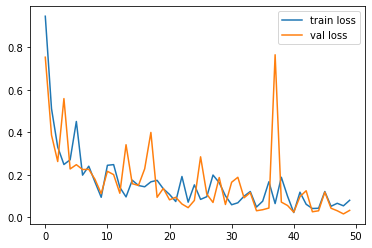

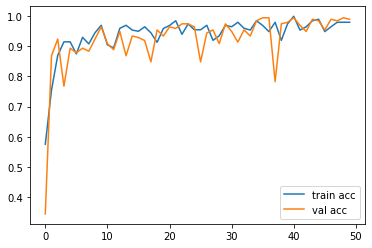

<Figure size 432x288 with 0 Axes>

In [35]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')